<a href="https://colab.research.google.com/github/remaskamal/NLP-Sentiment-Classifier/blob/main/SentimentAnalysisV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 AI project that automatically classifies customer emotions as positive, negative, or neutral based on the summary they write about the product they purchased.

I will clean the data in several steps in this file and then I will
 prepare it for an AI classification model

PART B

1) Import libraries request


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

3) Content with mydrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2) Read the file data

In [ ]:
#قراءة الملف
df = pd.read_csv('/content/drive/MyDrive/project AI Sentiment/Sentiment_dirtydata.csv')
#قرأة (الأعمدة و الصفوف )
print("show data information" ,df.info())

#قراءة اول خمس سجلات
print("first 5 records" ,df.head(5))

# قراءة اسماء  الأعمدة
print("names of columns" ,df.columns)

# معرفة حجم البيانات
print("data size" ,df.size)
df.value_counts()

# عرض انواع البيانات
print(df.dtypes)

# عرض تفاصيل البيانات
print(df.describe)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB
show data information None
first 5 records                                         product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

    

Verssion (1)

Data Cleaning

1. Checking the number of duplicate in the rows
2. Remove any unimportant marks [a]
3. Processing the columns name and type
4. Knowing if threre are nulls
5. Filling in the nulls


1) Checking the number of duplicate in the rows

In [ ]:
is_duplicates = df.duplicated().any()
print(is_duplicates)

# عرض عدد الصفوف قبل الحذف
print("Before:", df.shape)

# حذف التكرار مع إبقاء أول نسخة
df = df.drop_duplicates(keep='first')

# عرض عدد الصفوف بعد الحذف
print("After:", df.shape)


True
Before: (205052, 6)
After: (170677, 6)


2. Remove any unimportant marks [a]


In [ ]:
print("before : ", df['product_name'].head(11))

# product_name حذف العلامات الغير مهمة في عمود
df['product_name'] = df['product_name'].str.replace(r"[^a-zA-Z0-9\s()]/?+", "", regex=True)

# عرض الصفوف الاولى للتأكد من التغيير
print("after" ,df['product_name'].head(11))

before :  0     Candes 12 L Room/Personal Air Cooler??????(Whi...
1     Candes 12 L Room/Personal Air Cooler??????(Whi...
2     Candes 12 L Room/Personal Air Cooler??????(Whi...
3     Candes 12 L Room/Personal Air Cooler??????(Whi...
4     Candes 12 L Room/Personal Air Cooler??????(Whi...
5     Candes 12 L Room/Personal Air Cooler??????(Whi...
6     Candes 12 L Room/Personal Air Cooler??????(Whi...
7     Candes 12 L Room/Personal Air Cooler??????(Whi...
8     Candes 12 L Room/Personal Air Cooler??????(Whi...
9     Candes 12 L Room/Personal Air Cooler??????(Whi...
10    Candes 60 L Room/Personal Air Cooler??????(Whi...
Name: product_name, dtype: object
after 0     Candes 12 L RoomPersonal Air Cooler(White Blac...
1     Candes 12 L RoomPersonal Air Cooler(White Blac...
2     Candes 12 L RoomPersonal Air Cooler(White Blac...
3     Candes 12 L RoomPersonal Air Cooler(White Blac...
4     Candes 12 L RoomPersonal Air Cooler(White Blac...
5     Candes 12 L RoomPersonal Air Cooler(White Blac..

3. Processing the columns type


In [ ]:
# عرض انواع بيانات الأعمدة
print(df.dtypes)

#  string تحويل قيمة العمودين الى
df[['Summary','Sentiment', 'Review']].astype(str)

df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

#  تحويل product_price لعدد
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

# تحقق من انواع البيانات بعد التحويل
df.info()

product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 170677 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_name   170677 non-null  object 
 1   product_price  170674 non-null  float64
 2   Rate           170674 non-null  float64
 3   Review         154475 non-null  object 
 4   Summary        170667 non-null  object 
 5   Sentiment      170677 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.1+ MB


4. Knowing if threre are nulls

In [ ]:
# معرفة اذا كان يوجد قيم فارغة في البيانات
have_empty = df.empty
print(df.empty)

# عدد القيم الفارغة في الأعمدة
number_of_nulls= df.isnull().sum()
print(df.isnull().sum())

# عرض اقيم الفارغة في العمودين
print([df['Review'].isnull()])
print([df['Summary'].isnull()])


False
product_name         0
product_price        3
Rate                 3
Review           16202
Summary             10
Sentiment            0
dtype: int64
[0         False
1         False
2         False
3         False
4         False
          ...  
205045    False
205046    False
205049    False
205050    False
205051    False
Name: Review, Length: 170677, dtype: bool]
[0         False
1         False
2         False
3         False
4         False
          ...  
205045    False
205046    False
205049    False
205050    False
205051    False
Name: Summary, Length: 170677, dtype: bool]


5. Filling the nulls and drop column



In [ ]:
# تعبئة القيم الفارغة ب نص
df['Review'] = df['Review'].fillna("no review")
df['Summary'] = df['Summary'].fillna("no summary")
print(df)
print(df.isnull().sum())


                                             product_name product_price Rate  \
0       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
...                                                   ...           ...  ...   
205047  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205048  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205049  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    3   
205050  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205051  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    4   

                 Review                

Splitting (trainin , testing , and verification) datasets

In [ ]:
# اختيار عمودين فقط ك Features
X = df[['Review', 'Summary']]

# اختيار عمود الهدف
y = df['Sentiment']

# تقسيم البيانات 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# عرض حجم البيانات
print("حجم مجموعة التدريب:\n", X_train.shape, y_train.shape)
print("حجم مجموعة الاختبار:\n", X_test.shape, y_test.shape)

# عرض توزيع الفئات
print("\nتوزيع الفئات في التدريب:\n", y_train.value_counts())
print("\nتوزيع الفئات في الاختبار:\n", y_test.value_counts())


حجم مجموعة التدريب:
 (136541, 2) (136541,)
حجم مجموعة الاختبار:
 (34136, 2) (34136,)

توزيع الفئات في التدريب:
 Sentiment
positive    107760
negative     21178
neutral       7603
Name: count, dtype: int64

توزيع الفئات في الاختبار:
 Sentiment
positive    26941
negative     5295
neutral      1900
Name: count, dtype: int64


Creating a file and saving it as a CSV file in Google Colab

In [ ]:
df.to_csv('cleaned3_Sentimentdata.csv', index=False)
from google.colab import files
files.download('cleaned3_Sentimentdata.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Verssion (2)

 Convert text to lowercase letters to standardise the format of data

In [ ]:
# تحويل النص الى احرف صغيرة
df['product_name'] = df['product_name'].str.lower()
df['Review'] = df[ 'Review'].str.lower()
df['Summary'] = df[ 'Summary'].str.lower()
df['Sentiment'] = df[ 'Sentiment'].str.lower()
print(df.head(20))

                                         product_name  product_price  Rate  \
0   candes 12 l roompersonal air cooler(white blac...         3999.0   5.0   
1   candes 12 l roompersonal air cooler(white blac...         3999.0   5.0   
2   candes 12 l roompersonal air cooler(white blac...         3999.0   3.0   
3   candes 12 l roompersonal air cooler(white blac...         3999.0   1.0   
4   candes 12 l roompersonal air cooler(white blac...         3999.0   3.0   
5   candes 12 l roompersonal air cooler(white blac...         3999.0   5.0   
6   candes 12 l roompersonal air cooler(white blac...         3999.0   5.0   
7   candes 12 l roompersonal air cooler(white blac...         3999.0   3.0   
8   candes 12 l roompersonal air cooler(white blac...         3999.0   1.0   
9   candes 12 l roompersonal air cooler(white blac...         3999.0   4.0   
10  candes 60 l roompersonal air cooler(white blac...         8999.0   5.0   
11  candes 60 l roompersonal air cooler(white blac...         89

Remove marks and numbers unimportant

In [ ]:
# إزالة الرموز والأرقام الغير مهمة في العمودين
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))
df['Summary'] = df['Summary'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))
print(df[['Review', 'Summary']])

                 Review                                            Summary
0                 super  great cooler excellent air flow and for this p...
1               awesome               best budget  fit cooler nice cooling
2                  fair  the quality is good but the power of air is de...
3       useless product                  very bad product its a only a fan
4                  fair                                      ok ok product
...                 ...                                                ...
205045         terrific                              good quality products
205046   classy product                            beautiful set very nice
205049             nice                        very nice and fast delivery
205050         just wow                                    awesome product
205051    valueformoney  very good but mixing bowl not included is one ...

[170677 rows x 2 columns]


Remove of excess voids

In [ ]:
# إزالة الفراغات الزائدة
df['Review'] = df['Review'].str.strip()
df['Summary'] = df['Summary'].str.strip()
print(df[['Review', 'Summary']])

                 Review                                            Summary
0                 super  great cooler excellent air flow and for this p...
1               awesome               best budget  fit cooler nice cooling
2                  fair  the quality is good but the power of air is de...
3       useless product                  very bad product its a only a fan
4                  fair                                      ok ok product
...                 ...                                                ...
205045         terrific                              good quality products
205046   classy product                            beautiful set very nice
205049             nice                        very nice and fast delivery
205050         just wow                                    awesome product
205051    valueformoney  very good but mixing bowl not included is one ...

[170677 rows x 2 columns]


Disvovering outliner values (Boxplot)

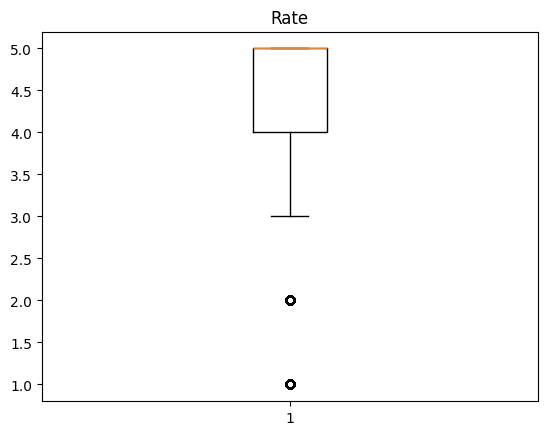

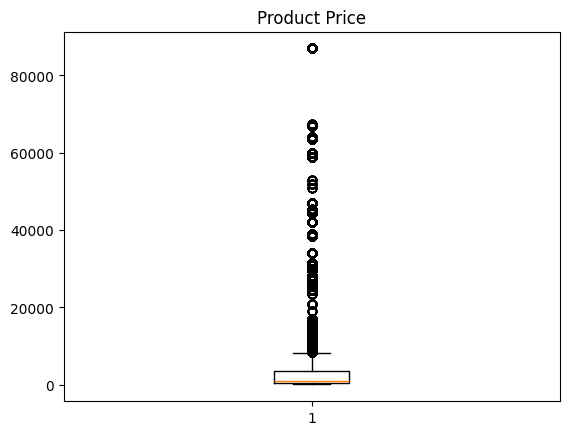

In [ ]:
#اكتشاف القيم الشاذة في عمود التقييم Rate
plt.boxplot(df['Rate'].dropna())
plt.title("Rate")
plt.show()

# product_price اكتشاف القيم الشاذة في عمود سعر المنتج
plt.boxplot(df['product_price'].dropna())
plt.title("Product Price")
plt.show()

Knowing the number of values in emotions

In [ ]:
# معرفة عدد القيم الموجودة في كل نوع من المشاعر
print(df['Sentiment'].value_counts())

Sentiment
positive    134701
negative     26473
neutral       9503
Name: count, dtype: int64


PART C

In [ ]:
# استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack

 (DecisionTreeClassifier) خوارزمية


Accuracy: 0.8600619346029114


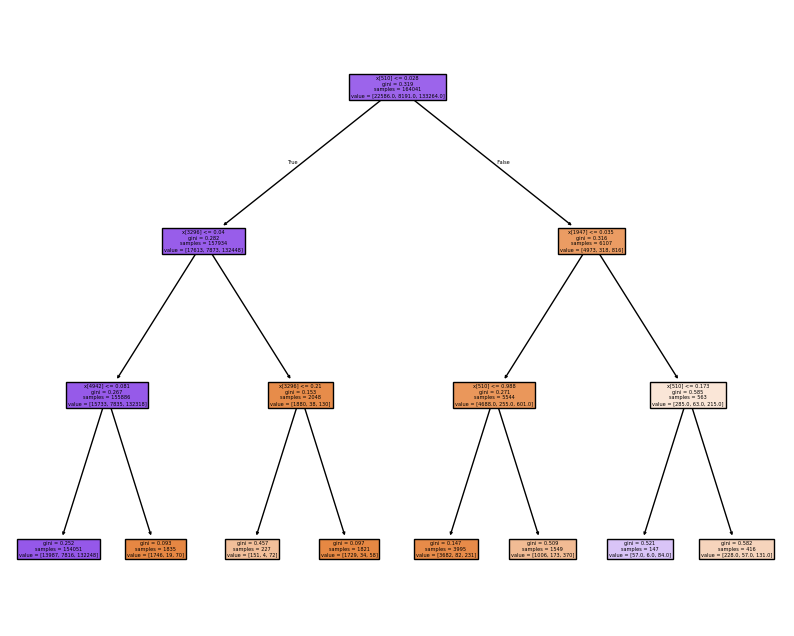

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# اختيار عمود واحد فقط ك Feature
X = df['Summary']
# الهدف
y = df['Sentiment']


# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split( X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# تحويل النص إلى أرقام باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# إنشاء النموذج
model = DecisionTreeClassifier(max_depth=3)

# تدريب النموذج
model.fit(X_train_tfidf, y_train)

# التنبؤ
y_pred_dt = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# استدعاء المكتبات للرسم
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plot_tree(model, filled=True, max_depth=3)
plt.show()

 ( Naive Bayes)خوارزمية المصنف الاحتمالي متعدد الحدود  

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# اختيار عمود واحد فقط ك Feature
X = df['Review']
# الهدف
y = df['Sentiment']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=38,
    stratify=y
)

# تحويل النص إلى أرقام باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# إنشاء النموذج
model = MultinomialNB()

# تدريب النموذج
model.fit(X_train_tfidf, y_train)

# التنبؤ
y_pred_nb = model.predict(X_test_tfidf)

# حساب Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Accuracy: 0.8901758064909414


Verssion (2)

(Logistic Regression)الانحدار اللوجستي

In [ ]:
from sklearn.linear_model import LogisticRegression
# اختيار عمود واحد فقط ك Feature
X = df['Summary']
# الهدف
y = df['Sentiment']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=30,
    stratify=y
)

# تحويل النص إلى أرقام باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# إنشاء النموذج
model = LogisticRegression( max_iter=1000)

# تدريب النموذج
model.fit(X_train_tfidf, y_train)

# التنبؤ
y_pred_lr = model.predict(X_test_tfidf)

# حساب Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# عرض المقاييس الأخرى
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9127794981834142

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.69      0.76      5646
     neutral       0.75      0.42      0.54      2048
    positive       0.93      0.98      0.95     33317

    accuracy                           0.91     41011
   macro avg       0.84      0.70      0.75     41011
weighted avg       0.91      0.91      0.91     41011



 Plot of accuracy for Algorithms

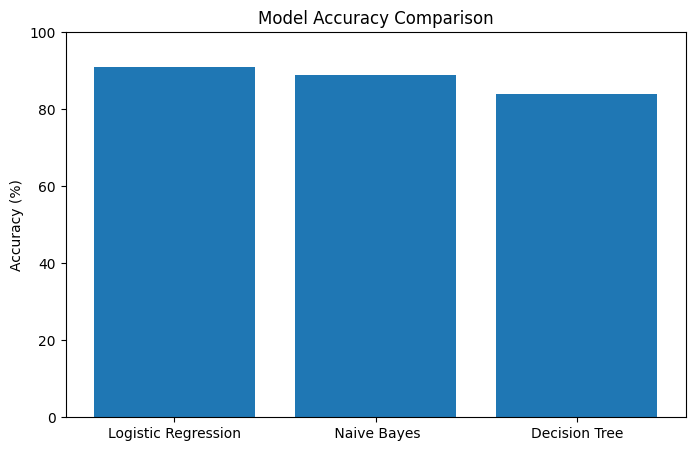

In [ ]:
accuracies = [91, 89 , 84 ]
models = ["Logistic Regression", " Naive Bayes", "Decision Tree"]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)

plt.ylabel("Accuracy (%)")
plt.ylim(0,100)
plt.title("Model Accuracy Comparison")
plt.show()



In [ ]:
! pip install joblib

In [ ]:
#  استيراد joblib
import joblib
# حفظ model داخل الدرايف
joblib.dump(model, "/content/drive/MyDrive/project AI Sentiment/sentiment_model.pkl")

joblib.dump(vectorizer, "/content/drive/MyDrive/project AI Sentiment/tfidf_vectorizer.pkl")

print("Files saved successfully to Google Drive")

Files saved successfully to Google Drive ✅
